## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [29]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/kc_house_data.csv", index_col='id')

In [4]:
#Exploring data
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [5]:
new = df["grade"].str.split(" ", n = 1, expand = True)

In [6]:
df["grade_1"]=new[0]

In [7]:
#find better way to do this
df['condition'] = df['condition'].map({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})

In [8]:
df['grade'] = df['grade'].map({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})

In [9]:
df['view'] = df['view'].map({'NONE': 1, 'AVERAGE': 2, 'GOOD': 3, 'FAIR': 4, 'EXCELLENT': 5})

In [10]:
df.dropna(subset=['view'], inplace=True)

In [11]:
df['waterfront'] = df['waterfront'].map({'YES': 1, 'NO': 0})

In [12]:
#Dropping irrelevant data
df= df.drop(["date","grade", "lat", "long","sqft_basement"], axis=1)

In [13]:
#i = pd.get_dummies(df, columns = ["zipcode"], prefix = "" ).corr()

In [14]:
#figure out how to do zip code
#df["zipcode"] = df["zipcode"].item.replace("_","")
#res = [df["zipcode"].replace('_', '') for integer in df["zipcode"]]

In [15]:
#possibly drop NA vales after checking data
#df['waterfront'].isna().sum()

In [16]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_1
id,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,1.0,3,1180,1955,0.0,98178,1340,5650,7
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,1.0,3,2170,1951,1991.0,98125,1690,7639,7
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,1.0,3,770,1933,NaN,98028,2720,8062,6
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,1.0,5,1050,1965,0.0,98136,1360,5000,7
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,1.0,3,1680,1987,0.0,98074,1800,7503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,1.0,3,1530,2009,0.0,98103,1530,1509,8
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,1.0,3,2310,2014,0.0,98146,1830,7200,8
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,1.0,3,1020,2009,0.0,98144,1020,2007,7


In [17]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
sqft_above         int64
yr_built           int64
yr_renovated     float64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
grade_1           object
dtype: object

In [18]:
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [19]:
df[["bedrooms","sqft_living","sqft_lot","condition","sqft_above","yr_built","sqft_living15","sqft_lot15"]] = df[["bedrooms","sqft_living","sqft_lot","condition","sqft_above","yr_built","sqft_living15","sqft_lot15"]].astype(float)

In [20]:
drop_idx = []
for cols in df:
    if df[cols].dtype not in (float, int):
        continue
    # grab indexes of all outliers, notice that its '>= 3' now 
    drop_idx.extend(df[np.abs(stats.zscore(df[cols])) >= 3].index)
df1 = df.drop(set(drop_idx))


In [21]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_1
id,,,,,,,,,,,,,,,,
7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,1.0,3.0,1180.0,1955.0,0.0,98178,1340.0,5650.0,7
6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,1.0,3.0,2170.0,1951.0,1991.0,98125,1690.0,7639.0,7
5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,1.0,3.0,770.0,1933.0,NaN,98028,2720.0,8062.0,6
2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,1.0,5.0,1050.0,1965.0,0.0,98136,1360.0,5000.0,7
1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,1.0,3.0,1680.0,1987.0,0.0,98074,1800.0,7503.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,1.0,3.0,1530.0,2009.0,0.0,98103,1530.0,1509.0,8
6600060120,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,1.0,3.0,2310.0,2014.0,0.0,98146,1830.0,7200.0,8
1523300141,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,1.0,3.0,1020.0,2009.0,0.0,98144,1020.0,2007.0,7


In [22]:
df1.corr().sort_values(by="price", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.306655,0.456917,0.630107,0.091499,0.270553,0.035845,0.249899,0.047287,0.526498,0.033438,0.108539,-0.020641,0.552293,0.082134
sqft_living,0.630107,0.609276,0.713061,1.000000,0.223487,0.346488,-0.001830,0.180337,-0.064004,0.847864,0.337994,0.034684,-0.203075,0.742969,0.222742
sqft_living15,0.552293,0.402743,0.534738,0.742969,0.260638,0.271196,0.005827,0.188151,-0.104691,0.720504,0.346089,-0.031624,-0.289242,1.000000,0.286012
sqft_above,0.526498,0.485252,0.631561,0.847864,0.209425,0.537149,-0.001903,0.074757,-0.175652,1.000000,0.451801,0.003431,-0.271887,0.720504,0.215299
bathrooms,0.456917,0.496466,1.000000,0.713061,0.059068,0.509343,-0.001162,0.106423,-0.138557,0.631561,0.541417,0.032915,-0.208140,0.534738,0.060962
bedrooms,0.306655,1.000000,0.496466,0.609276,0.101845,0.161393,-0.025157,0.052381,0.027200,0.485252,0.166724,0.006341,-0.164449,0.402743,0.100404
floors,0.270553,0.161393,0.509343,0.346488,-0.101839,1.000000,0.002880,-0.002602,-0.279241,0.537149,0.502850,-0.002449,-0.057554,0.271196,-0.105057
view,0.249899,0.052381,0.106423,0.180337,0.046106,-0.002602,0.126064,1.000000,0.028089,0.074757,-0.059917,0.069608,0.091761,0.188151,0.039241
yr_renovated,0.108539,0.006341,0.032915,0.034684,0.010484,-0.002449,0.020868,0.069608,-0.061443,0.003431,-0.217651,1.000000,0.072579,-0.031624,0.007003
sqft_lot,0.091499,0.101845,0.059068,0.223487,1.000000,-0.101839,0.040215,0.046106,0.041411,0.209425,0.029967,0.010484,-0.188160,0.260638,0.817867


In [23]:
y = df1["price"]

In [24]:
X = df1.drop("price", axis=1)

In [27]:
result1 = sm.ols(formula="price ~ bedrooms", data=df1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2053.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:55:58   Log-Likelihood:            -2.7222e+05
No. Observations:               19782   AIC:                         5.444e+05
Df Residuals:                   19780   BIC:                         5.445e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.014e+05   6543.953     30.775      0.0

ConversionError: Failed to convert value(s) to axis units: array(['7', '7', '6', ..., '7', '8', '7'], dtype=object)

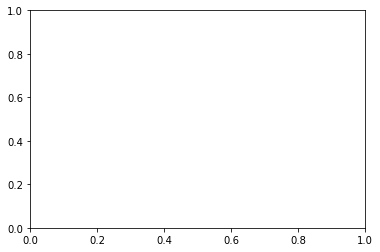

In [32]:
plt.plot(X,y)

In [ ]:
result = sm.ols(formula="price ~ bedrooms + bathrooms+ sqft_living + sqft_lot + floors + waterfront + view + condition + sqft_above + yr_built + yr_renovated + zipcode + sqft_living15 + sqft_lot15", data=df1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     1123.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:43:16   Log-Likelihood:            -1.9427e+05
No. Observations:               14454   AIC:                         3.886e+05
Df Residuals:                   14439   BIC:                         3.887e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.681e+07   2.96e+06     -5.684

In [ ]:
model = sm.OLS(y, sm.add_constant(X.astype(float)), missing = "drop").fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1429.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:51:22   Log-Likelihood:            -1.9301e+05
No. Observations:               14454   AIC:                         3.861e+05
Df Residuals:                   14438   BIC:                         3.862e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.384e+06   2.72e+06     -2.349

In [ ]:
#possibly drop sqft_above because its similar to sqf_living

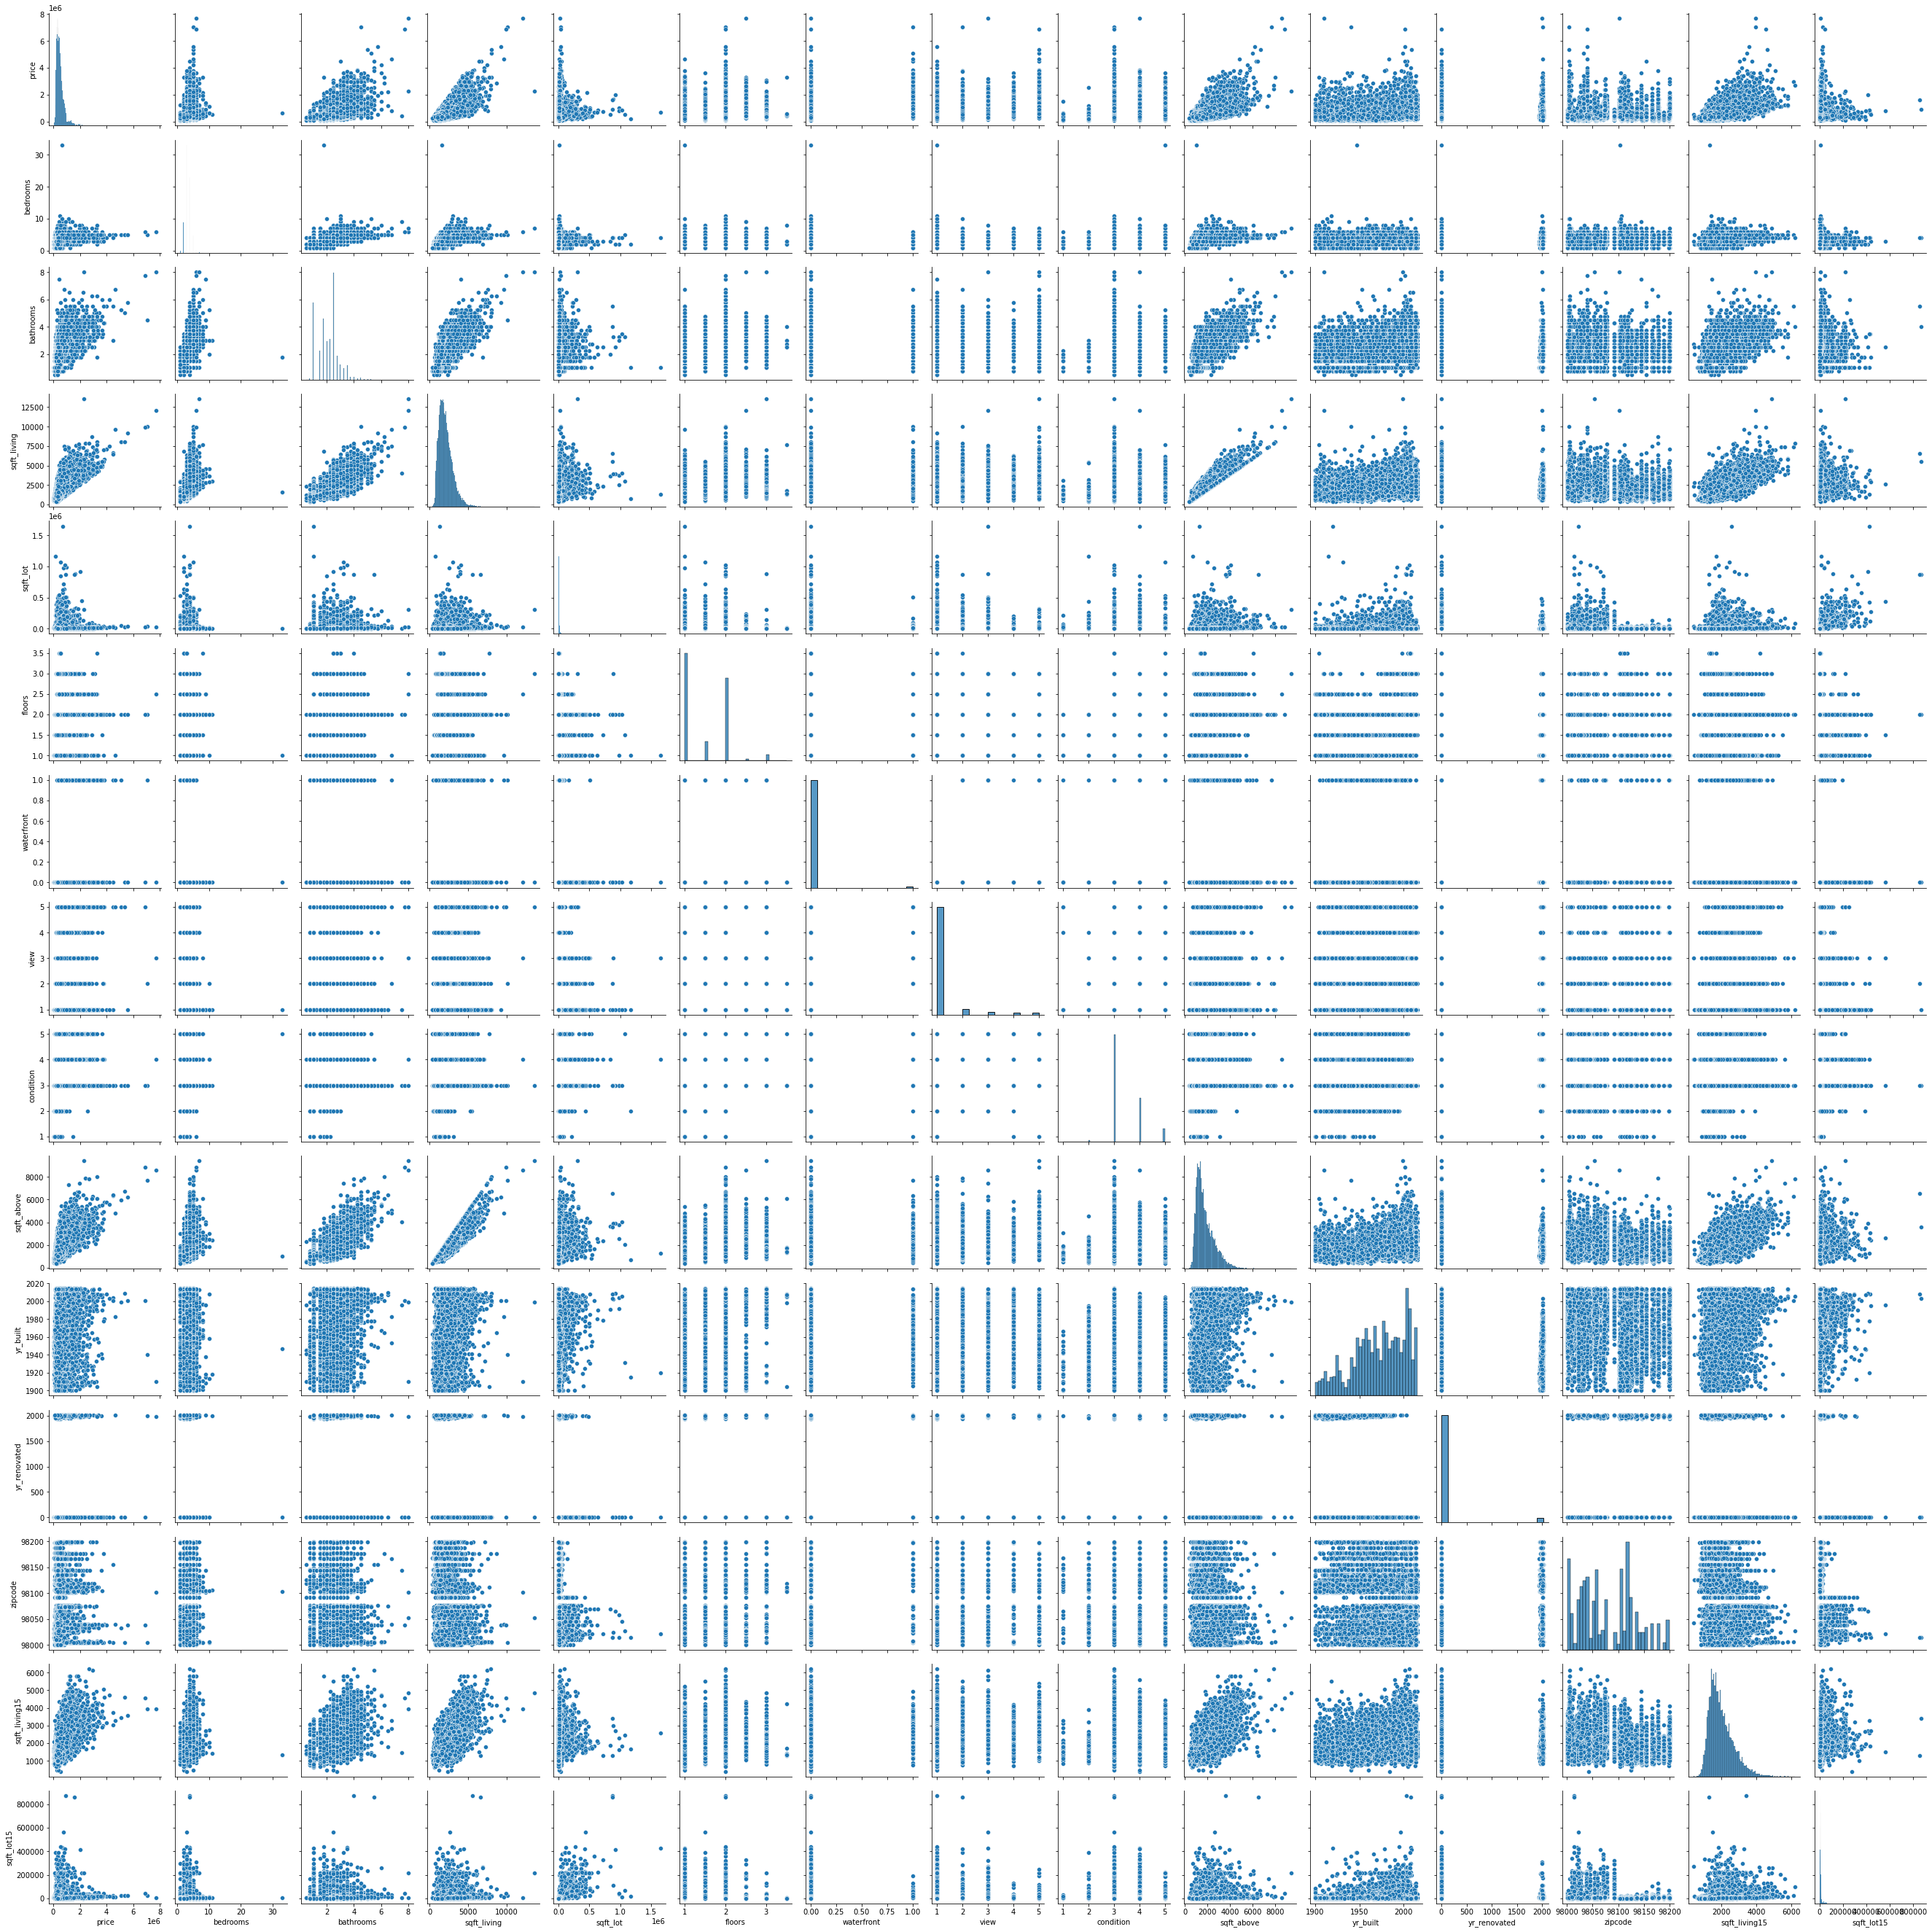

In [ ]:
sns.pairplot(df)

In [ ]:
corr = df.corr().sort_values(by="price", ascending=False)

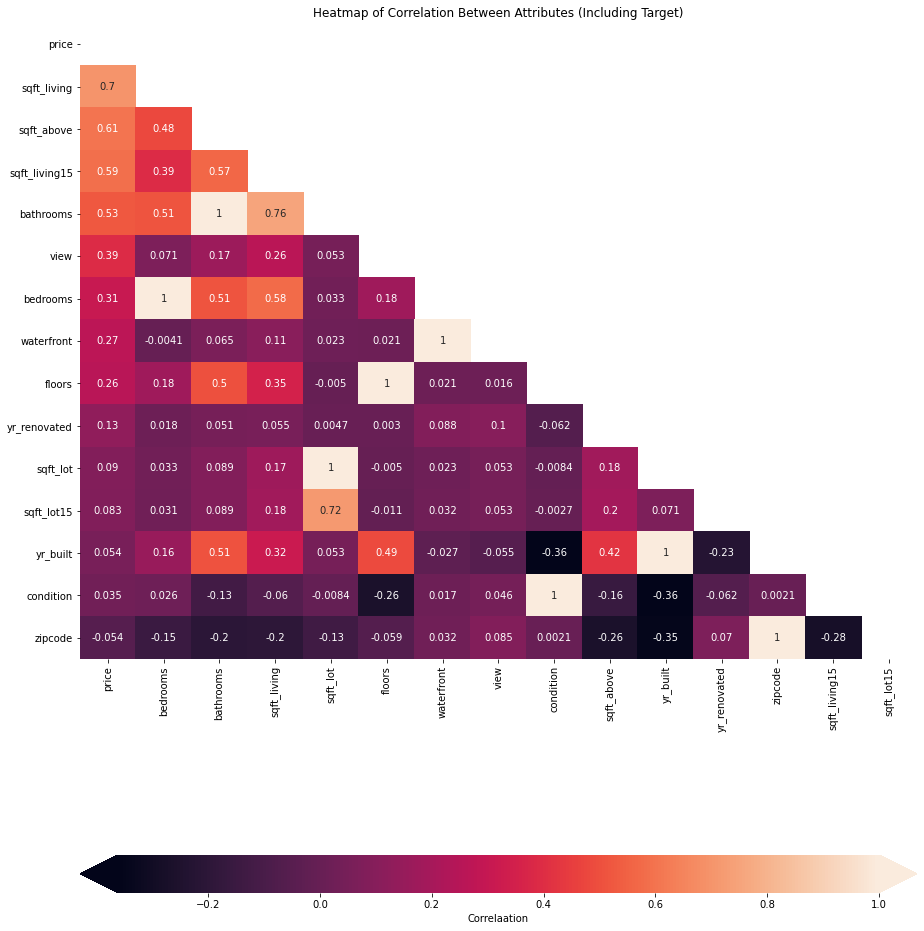

In [ ]:
fig, ax = plt.subplots(figsize=(15,18))
sns.heatmap(data = corr, mask = np.triu(np.ones_like(corr, dtype=bool)), ax = ax, annot = True, cbar_kws = {"label": "Correlaation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");
